In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [17]:
## combined

In [18]:
# # Names of the aggregation functions
# agg_funcs = ['min', 'mean', 'max', 'sum']
# # Initialize an empty DataFrame for concatenated features
# concatenated_features = pd.DataFrame()
# for agg_func in agg_funcs:
#     # Load each dataframe
#     df = pd.read_pickle(f'datasets/df_cathub_dpp_{agg_func}.pickle')
#     # Update column names with 'agg_func' prefix for all columns except the last one
#     df.columns = [f"{agg_func}_{col}" if col != 'nre' else col for col in df.columns]
#     # Concatenate features (all columns except the last one)
#     concatenated_features = pd.concat([concatenated_features, df.iloc[:, :-1]], axis=1)
# # Assuming the target column ('nre') is identical in all dataframes, take it from the first dataframe
# target_column = pd.read_pickle('datasets/df_cathub_dpp_min.pickle')['nre']
# # Combine the concatenated features with the target column
# final_df = pd.concat([concatenated_features, target_column], axis=1)
# print(final_df.shape)
# # Save the final dataframe as a pickle file
# final_df.to_pickle('datasets/df_cathub_dpp_combined.pickle')

(10938, 1025)


In [19]:
## performance evaluation

In [20]:
hyperparams = [0.001, 0.01, 0.1, 1]
agg_funcs = ['min', 'mean', 'max', 'sum', 'combined']
best_scores = {}
best_alphas = {}

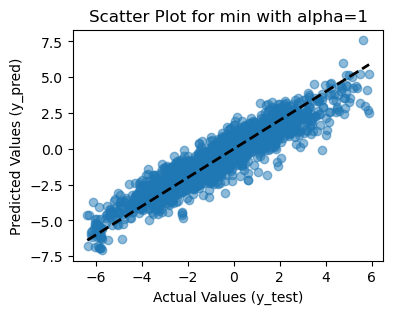

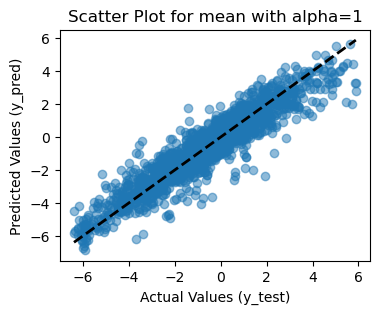

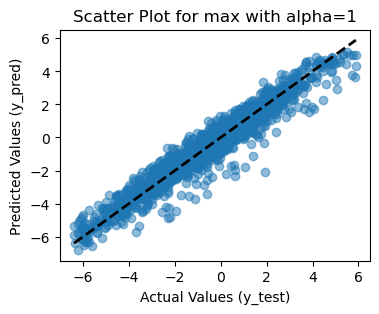

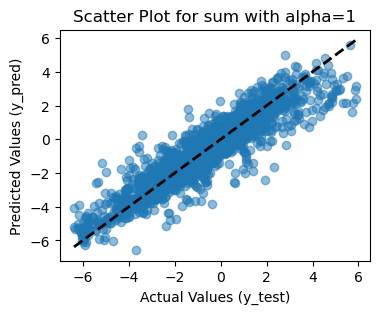

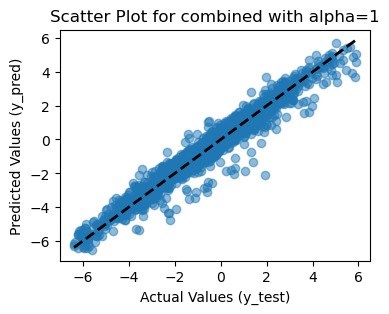

In [21]:
for agg_func in agg_funcs:
    # Load dataframe
    df = pd.read_pickle(f'datasets/df_cathub_dpp_{agg_func}.pickle')
    # Splitting into features and target
    X = df.iloc[:, :-1]  # Assuming last column is 'nre'
    y = df['nre']
    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Variables to store the best score and alpha for the current dataframe
    best_score = float('inf')
    best_alpha = None
    best_y_pred = None
    for alpha in hyperparams:
        # Initialize and train model
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        # Make predictions and evaluate
        y_pred = model.predict(X_test)
        score = mean_absolute_error(y_test, y_pred)
        # Update the best score and alpha if the current model is better
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_y_pred = y_pred
    # Store the best score and alpha for the current dataframe
    best_scores[agg_func] = best_score
    best_alphas[agg_func] = best_alpha
    # Plot y_test vs y_pred
    plt.figure(figsize=(4, 3))      
    plt.scatter(y_test, best_y_pred, alpha=0.5)
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.title(f'Scatter Plot for {agg_func} with alpha={best_alpha}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
    plt.show()

In [22]:
# Print the best alpha for each dataframe
for agg_func in agg_funcs:
    print(f"Best alpha for {agg_func}: {best_alphas[agg_func]} with score: {best_scores[agg_func]}")
print(np.mean(np.abs(y_test)))

Best alpha for min: 1 with score: 0.5983938743370081
Best alpha for mean: 1 with score: 0.5438289183369415
Best alpha for max: 1 with score: 0.4035351883269884
Best alpha for sum: 1 with score: 0.6080693426815916
Best alpha for combined: 1 with score: 0.33474523792047745
1.7904069986914115
